In [246]:
import os
os.chdir("C:\\Users\\vgonsalv\\Desktop\\DataScience\\analytics vidhya\\Project\\Big Mart Sales III")
os.getcwd()

'C:\\Users\\vgonsalv\\Desktop\\DataScience\\analytics vidhya\\Project\\Big Mart Sales III'

In [247]:
import pandas as pd
df=pd.read_csv('train.csv',header=0,sep=',',na_values=[""," ","NA","NaN",'0'])

In [249]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [250]:
#check types...all ok..except for Outlet_Establishment_Year which is converted below
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [251]:
df['Outlet_Years_Operational'] = 2013 - df['Outlet_Establishment_Year']
df=df.drop(['Outlet_Establishment_Year'],axis=1)
df['Outlet_Years_Operational'].value_counts()

28    1463
26     932
14     930
9      930
16     930
11     929
4      928
6      926
15     555
Name: Outlet_Years_Operational, dtype: int64

In [252]:
#drop identifier...no value
df=df.drop(['Item_Identifier'],axis=1)

In [253]:
df.pivot_table(values='Item_Outlet_Sales',index='Outlet_Size')

,Item_Outlet_Sales
Outlet_Size,
High,2298.995256
Medium,2681.603542
Small,1912.149161


In [254]:
df.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years_Operational
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,19.200,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,15
4,8.930,Low Fat,NaN,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26
5,10.395,Regular,NaN,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088,4
6,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528,26
7,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636,28
8,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,NaN,Tier 2,Supermarket Type1,1076.5986,11
9,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,NaN,Tier 2,Supermarket Type1,4710.5350,6


In [255]:
print(df['Outlet_Years_Operational'].value_counts())
#---fixed numvber of establishment counts hence convert to object
df['Outlet_Years_Operational'] =  df['Outlet_Years_Operational'].astype(object)

28    1463
26     932
14     930
9      930
16     930
11     929
4      928
6      926
15     555
Name: Outlet_Years_Operational, dtype: int64


In [256]:
#Change categories of low fat:
print ('Original Categories:')
print (df['Item_Fat_Content'].value_counts())
print ('\nModified Categories:')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (df['Item_Fat_Content'].value_counts())


Original Categories:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [257]:
df.dtypes

Item_Weight                 float64
Item_Fat_Content             object
Item_Visibility             float64
Item_Type                    object
Item_MRP                    float64
Outlet_Identifier            object
Outlet_Size                  object
Outlet_Location_Type         object
Outlet_Type                  object
Item_Outlet_Sales           float64
Outlet_Years_Operational     object
dtype: object

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

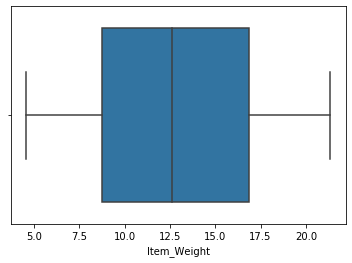

In [258]:
#---OA for num values
import seaborn as sns
import numpy as np  
sns.boxplot(df['Item_Weight'])
df["Item_Weight"].describe()

In [259]:
q25=8.773750
q75=16.850000
iqr=q75-q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)
df['Item_Weight'][df['Item_Weight']<min] = np.nan
df['Item_Weight'][df['Item_Weight']>max] = np.nan

-3.340625000000003
28.964375000000004


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [18]:
df.dtypes

Item_Weight                 float64
Item_Fat_Content             object
Item_Visibility             float64
Item_Type                    object
Item_MRP                    float64
Outlet_Identifier            object
Outlet_Size                  object
Outlet_Location_Type         object
Outlet_Type                  object
Item_Outlet_Sales           float64
Outlet_Years_Operational     object
dtype: object

count    7997.000000
mean        0.070482
std         0.050308
min         0.003575
25%         0.031403
50%         0.057792
75%         0.098109
max         0.328391
Name: Item_Visibility, dtype: float64

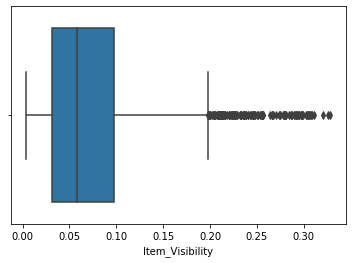

In [260]:
sns.boxplot(df['Item_Visibility'])
df["Item_Visibility"].describe()

In [261]:
q25=0.031403
q75=0.098109
iqr=q75-q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)
df['Item_Visibility'][df['Item_Visibility']<min] = np.nan
df['Item_Visibility'][df['Item_Visibility']>max] = np.nan

-0.06865600000000001
0.198168


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [21]:
df.dtypes

Item_Weight                 float64
Item_Fat_Content             object
Item_Visibility             float64
Item_Type                    object
Item_MRP                    float64
Outlet_Identifier            object
Outlet_Size                  object
Outlet_Location_Type         object
Outlet_Type                  object
Item_Outlet_Sales           float64
Outlet_Years_Operational     object
dtype: object

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

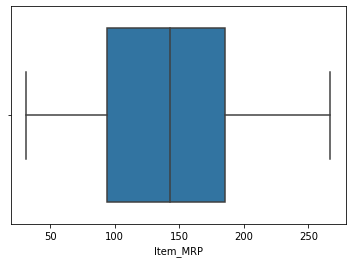

In [262]:
sns.boxplot(df['Item_MRP'])
df["Item_MRP"].describe()

In [263]:
q25=93.826500
q75=185.643700
iqr=q75-q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)
df['Item_MRP'][df['Item_MRP']<min] = np.nan
df['Item_MRP'][df['Item_MRP']>max] = np.nan

-43.8993
323.3695


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [24]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years_Operational
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,19.200,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,15
4,8.930,Low Fat,NaN,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,26
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,NaN,Tier 2,Supermarket Type1,549.2850,11
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,4


In [264]:
missing_val=pd.DataFrame(df.isnull().sum())
missing_val=missing_val.reset_index()
#Renaming Variable
missing_val = missing_val.rename(columns = {'index':'Variable Name', 0 : 'Missing-Percentage'})
#Calculating Missing Value Percentage
missing_val['Missing-Percentage'] = (missing_val['Missing-Percentage']/len(df))*100
missing_val

,Variable Name,Missing-Percentage
0,Item_Weight,17.165317
1,Item_Fat_Content,0.000000
2,Item_Visibility,7.814150
3,Item_Type,0.000000
4,Item_MRP,0.000000
5,Outlet_Identifier,0.000000
6,Outlet_Size,28.276428
7,Outlet_Location_Type,0.000000
8,Outlet_Type,0.000000
9,Item_Outlet_Sales,0.000000


In [265]:
copy_df=df.copy()
copy_df['Item_Weight'].iloc[110]
copy_df['Item_Weight'].iloc[110]=np.nan #value=13.3
copy_df['Item_Weight'].iloc[110]
copy_df['Item_Weight'] = copy_df['Item_Weight'].fillna(copy_df['Item_Weight'].mean())
copy_df['Item_Weight'].iloc[110]#value 12.866
copy_df=df.copy()
copy_df['Item_Weight'].iloc[110]
copy_df['Item_Weight'].iloc[110]=np.nan #value=13.3
copy_df['Item_Weight'] = copy_df['Item_Weight'].fillna(copy_df['Item_Weight'].median())
copy_df['Item_Weight'].iloc[110]#value 12.6
#take mean for MVA
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [266]:
copy_df=df.copy()
copy_df['Item_Visibility'].iloc[110]
copy_df['Item_Visibility'].iloc[110]=np.nan #value=0.07
copy_df['Item_Visibility'].iloc[110]
copy_df['Item_Visibility'] = copy_df['Item_Visibility'].fillna(copy_df['Item_Visibility'].mean())
copy_df['Item_Visibility'].iloc[110]#value 0.067
copy_df=df.copy()
copy_df['Item_Visibility'].iloc[110]
copy_df['Item_Visibility'].iloc[110]=np.nan #value=0.07
copy_df['Item_Visibility'] = copy_df['Item_Visibility'].fillna(copy_df['Item_Visibility'].median())
copy_df['Item_Visibility'].iloc[110]#value 0.05
#take mean for MVA
df['Item_Visibility'] = df['Item_Visibility'].fillna(df['Item_Weight'].mean())

In [267]:
#checking the test data even there outlet size has missing values..so we introduce a new category 'Missing' for mising vals
#and let algo take care of them both in train and test data
df['Outlet_Size'] = df['Outlet_Size'].fillna('Missing')
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [159]:
#check if item_mrp or item_weight <0..i.e.absurd values
df.ix[(df['Item_MRP']<0.1)|(df['Item_MRP']<0.1)]

C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years_Operational


In [30]:
df.dtypes

Item_Weight                 float64
Item_Fat_Content             object
Item_Visibility             float64
Item_Type                    object
Item_MRP                    float64
Outlet_Identifier            object
Outlet_Size                  object
Outlet_Location_Type         object
Outlet_Type                  object
Item_Outlet_Sales           float64
Outlet_Years_Operational     object
dtype: object

In [268]:
#check corelation of num variables
cnames=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
df_corr=df.loc[:,cnames]
corr=df_corr.corr()
corr
#--no corelation found

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.020604,0.024756,0.011550
Item_Visibility,-0.020604,1.000000,-0.008807,-0.061341
Item_MRP,0.024756,-0.008807,1.000000,0.567574
Item_Outlet_Sales,0.011550,-0.061341,0.567574,1.000000


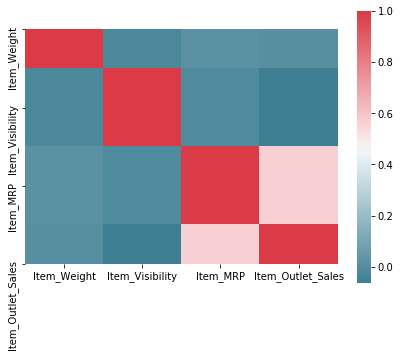

In [127]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize=(7,5))
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

In [33]:
df.dtypes

Item_Weight                 float64
Item_Fat_Content             object
Item_Visibility             float64
Item_Type                    object
Item_MRP                    float64
Outlet_Identifier            object
Outlet_Size                  object
Outlet_Location_Type         object
Outlet_Type                  object
Item_Outlet_Sales           float64
Outlet_Years_Operational     object
dtype: object

In [269]:
#feature selection for categorical vars
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('Item_Outlet_Sales ~ Item_Fat_Content', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Item_Fat_Content,8.695560e+06,1.0,2.986664,0.083989
Residual,2.480857e+10,8521.0,NaN,NaN


In [35]:
mod = ols('Item_Outlet_Sales ~ Item_Type', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Item_Type,1.176182e+08,15.0,2.700653,0.000388
Residual,2.469965e+10,8507.0,NaN,NaN


In [36]:
mod = ols('Item_Outlet_Sales ~ Outlet_Identifier', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Outlet_Identifier,5.976994e+09,9.0,300.079135,0.0
Residual,1.884027e+10,8513.0,NaN,NaN


In [37]:
mod = ols('Item_Outlet_Sales ~ Outlet_Years_Operational', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Outlet_Years_Operational,2.181643e+09,8.0,102.573452,6.744878e-164
Residual,2.263562e+10,8514.0,NaN,NaN


In [38]:
mod = ols('Item_Outlet_Sales ~ Outlet_Size', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Outlet_Size,1.195038e+09,3.0,143.657467,8.228024e-91
Residual,2.362223e+10,8519.0,NaN,NaN


In [39]:
mod = ols('Item_Outlet_Sales ~ Outlet_Location_Type', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Outlet_Location_Type,3.103504e+08,2.0,53.94774,5.222817e-24
Residual,2.450691e+10,8520.0,NaN,NaN


In [40]:
mod = ols('Item_Outlet_Sales ~ Outlet_Type', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Outlet_Type,5.945604e+09,3.0,894.650012,0.0
Residual,1.887166e+10,8519.0,NaN,NaN


In [270]:
df = df.drop(['Item_Fat_Content'], axis=1)

In [42]:
df.dtypes

Item_Weight                 float64
Item_Visibility             float64
Item_Type                    object
Item_MRP                    float64
Outlet_Identifier            object
Outlet_Size                  object
Outlet_Location_Type         object
Outlet_Type                  object
Item_Outlet_Sales           float64
Outlet_Years_Operational     object
dtype: object

In [271]:
#check for multicollnearity
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
outcome, predictors = dmatrices('Item_Outlet_Sales ~ Item_Weight+Item_Visibility+Item_Type+Item_MRP +Outlet_Identifier+Outlet_Years_Operational+Outlet_Size+Outlet_Location_Type+Outlet_Type',df, return_type='dataframe')
# calculating VIF for each individual Predictors
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,0.000000,Intercept
1,1.349617,Item_Type[T.Breads]
2,1.156131,Item_Type[T.Breakfast]
3,1.853762,Item_Type[T.Canned]
4,1.901844,Item_Type[T.Dairy]
5,2.093492,Item_Type[T.Frozen Foods]
6,2.497396,Item_Type[T.Fruits and Vegetables]
7,1.299398,Item_Type[T.Hard Drinks]
8,1.695126,Item_Type[T.Health and Hygiene]
9,2.166222,Item_Type[T.Household]


(array([281., 564., 690., ...,   0.,   0., 666.]),
 array([3.57469800e-03, 1.12032265e-02, 1.88317550e-02, ...,
        1.28423881e+01, 1.28500167e+01, 1.28576452e+01]),
 <a list of 1685 Patch objects>)

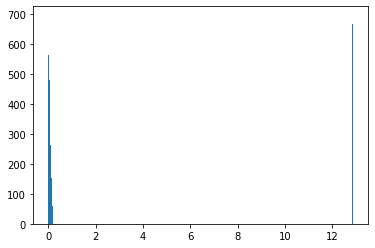

In [44]:
#feature scaling of num values
#Item_Weight and Item_MRP is unformly dist..so go for stdisation.Item_Visibility is sparsely dist so go for normalisation
%matplotlib inline
plt.hist(df['Item_Visibility'],bins='auto')

In [272]:
cnames=['Item_Weight','Item_MRP']
for i in cnames:
    print(i)
    df[i]=(df[i]-df[i].mean())/df[i].std()

Item_Weight
Item_MRP


In [273]:
cnames=['Item_Visibility']
for i in cnames:
    print(i)
    df[i]=(df[i]-df[i].mean())/df[i].std()

Item_Visibility


In [275]:
#convert cat var to 0 and 1 i.e. binning
cat_names=['Item_Type','Outlet_Years_Operational','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in cat_names:
    print(i)
    df[i]=pd.Categorical(df[i])
    df[i]=df[i].cat.codes
    df[i]=df[i].astype(object)

Item_Type
Outlet_Years_Operational
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [274]:
df.dtypes

Item_Weight                 float64
Item_Visibility             float64
Item_Type                    object
Item_MRP                    float64
Outlet_Identifier            object
Outlet_Size                  object
Outlet_Location_Type         object
Outlet_Type                  object
Item_Outlet_Sales           float64
Outlet_Years_Operational     object
dtype: object

In [51]:
df['Outlet_Identifier'].value_counts()


OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [276]:
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT027','0')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT013','1')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT035','2')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT049','3')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT046','4')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT045','5')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT018','6')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT017','7')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT010','8')
df['Outlet_Identifier']=df['Outlet_Identifier'].replace('OUT019','9')

In [168]:
df.head(2)

,Outlet_Years_Operational,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,4,-0.841822,-0.306048,4,1.747351,3,1,0,1,3735.1380
1,0,-1.641610,-0.305107,14,-1.488936,6,1,2,2,443.4228


In [277]:
df = df[['Outlet_Years_Operational','Item_Weight','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']]

In [278]:
#stratify on outlet type as its highly skewed
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
y = np.array(df['Outlet_Type'])
train_set,validation_set = train_test_split(df, test_size = 0.2, stratify = y) 

In [170]:
train_set.iloc[:,9].head(3)

5207    1298.3100
6756    1720.4272
4026     322.2472
Name: Item_Outlet_Sales, dtype: float64

In [171]:
train_set.iloc[:,0:9].head(3)

,Outlet_Years_Operational,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
5207,6,-3.212507e-01,3.434250,4,-0.846868,4,3,0,1
6756,7,-7.235106e-01,-0.296989,0,-0.619689,1,0,2,1
4026,8,-5.338162e-14,-0.271528,13,0.302381,9,3,0,0


In [172]:
train_set.head(3)

,Outlet_Years_Operational,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5207,6,-3.212507e-01,3.434250,4,-0.846868,4,3,0,1,1298.3100
6756,7,-7.235106e-01,-0.296989,0,-0.619689,1,0,2,1,1720.4272
4026,8,-5.338162e-14,-0.271528,13,0.302381,9,3,0,0,322.2472


In [173]:
validation_set.iloc[:,0:9].head(3)

,Outlet_Years_Operational,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
8307,3,1.737373,-0.291479,9,-1.278871,5,2,1,1
5575,3,-1.464142,-0.274699,13,-0.835670,5,2,1,1
5242,4,1.500750,-0.298695,9,-0.174416,3,1,0,1


In [279]:
#decision tree model
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train_set.iloc[:,0:9], train_set.iloc[:,9])
predictions_DT = fit_DT.predict(validation_set.iloc[:,0:9])

In [280]:
def rmse(targets,predictions): 
    return np.sqrt(((predictions - targets) ** 2).mean())

In [281]:
rmse(validation_set.iloc[:,9],predictions_DT)

1306.9015205158757

In [282]:
RF_model = RandomForestRegressor(n_estimators = 600).fit(train_set.iloc[:,0:9], train_set.iloc[:,9])
RF_Predictions = RF_model.predict(validation_set.iloc[:,0:9])

In [283]:
rmse(validation_set.iloc[:,9],RF_Predictions)

1185.9532204991715

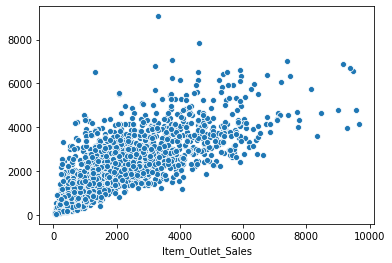

In [179]:
sns.scatterplot(x=validation_set["Item_Outlet_Sales"], y=RF_Predictions)

In [284]:
df.dtypes

Outlet_Years_Operational     object
Item_Weight                 float64
Item_Visibility             float64
Item_Type                    object
Item_MRP                    float64
Outlet_Identifier            object
Outlet_Size                  object
Outlet_Location_Type         object
Outlet_Type                  object
Item_Outlet_Sales           float64
dtype: object

In [285]:
cat_names=['Item_Type','Outlet_Years_Operational','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in cat_names:
    print(i)
    df[i]=df[i].astype(float)

Item_Type
Outlet_Years_Operational
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [288]:
df = df[['Outlet_Years_Operational','Item_Weight','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']]

In [290]:
y = np.array(df['Outlet_Type'])
train_set,validation_set = train_test_split(df, test_size = 0.2, stratify = y) 

In [294]:
train_set.iloc[:,0:8].head(3)

,Outlet_Years_Operational,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
2069,1.0,-0.984979,-0.275708,9.0,-0.767296,2.0,1.0,1.0
6086,1.0,0.069178,3.434250,6.0,0.497528,2.0,1.0,1.0
3562,7.0,1.145815,-0.295897,9.0,-0.247691,0.0,2.0,1.0


In [292]:
validation_set.iloc[:,0:8].head(3)

,Outlet_Years_Operational,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
1148,1.0,1.536243,-0.299026,14.0,0.380474,2.0,1.0,1.0
3687,3.0,-1.859303,3.434250,14.0,0.784587,2.0,1.0,1.0
3352,4.0,-0.368575,-0.294808,10.0,-0.765690,1.0,0.0,1.0


In [331]:
from xgboost import XGBRegressor
XGB_model=XGBRegressor(n_estimators=1000,learning_rate=0.35)
XGB_model.fit(train_set.iloc[:,0:8], train_set.iloc[:,8],early_stopping_rounds=5,eval_set=[(validation_set.iloc[:,0:8],validation_set.iloc[:,8])],verbose=False)
XGBR_Predictions = XGB_model.predict(validation_set.iloc[:,0:8])

In [332]:
rmse(validation_set.iloc[:,8],XGBR_Predictions)

1129.6509342077306

In [298]:
df_test=pd.read_csv('Test.csv',header=0,sep=',',na_values=[""," ","NA","NaN"])

In [299]:
df_test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [300]:
missing_val=pd.DataFrame(df_test.isnull().sum())
missing_val=missing_val.reset_index()
#Renaming Variable
missing_val = missing_val.rename(columns = {'index':'Variable Name', 0 : 'Missing-Percentage'})
#Calculating Missing Value Percentage
missing_val['Missing-Percentage'] = (missing_val['Missing-Percentage']/len(df_test))*100
missing_val

,Variable Name,Missing-Percentage
0,Item_Identifier,0.000000
1,Item_Weight,17.180074
2,Item_Fat_Content,0.000000
3,Item_Visibility,0.000000
4,Item_Type,0.000000
5,Item_MRP,0.000000
6,Outlet_Identifier,0.000000
7,Outlet_Establishment_Year,0.000000
8,Outlet_Size,28.269671
9,Outlet_Location_Type,0.000000


In [301]:
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())

In [302]:
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna('Missing')
df_test['Outlet_Size'].value_counts()

Medium     1862
Missing    1606
Small      1592
High        621
Name: Outlet_Size, dtype: int64

In [303]:
df_test['Outlet_Years_Operational'] = 2013 - df_test['Outlet_Establishment_Year']
df_test=df_test.drop(['Outlet_Establishment_Year'],axis=1)
df_test['Outlet_Years_Operational'].value_counts()

28    976
26    621
14    620
9     620
16    620
11    619
4     618
6     617
15    370
Name: Outlet_Years_Operational, dtype: int64

In [304]:
df_test = df_test.drop(['Item_Fat_Content'], axis=1)

In [305]:
cnames=['Item_Weight','Item_MRP','Item_Visibility']
for i in cnames:
    print(i)
    df_test[i]=(df_test[i]-df_test[i].mean())/df_test[i].std()

Item_Weight
Item_MRP
Item_Visibility


In [306]:
cat_names=['Item_Type','Outlet_Years_Operational','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in cat_names:
    print(i)
    df_test[i]=pd.Categorical(df_test[i])
    df_test[i]=df_test[i].cat.codes
    df_test[i]=df_test[i].astype(object)

Item_Type
Outlet_Years_Operational
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [307]:
df_test['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT046    620
OUT049    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [310]:
df_test.dtypes

Item_Identifier              object
Item_Weight                 float64
Item_Visibility             float64
Item_Type                   float64
Item_MRP                    float64
Outlet_Identifier            object
Outlet_Size                 float64
Outlet_Location_Type        float64
Outlet_Type                 float64
Outlet_Years_Operational    float64
dtype: object

In [309]:
cat_names=['Item_Type','Outlet_Years_Operational','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in cat_names:
    print(i)
    df_test[i]=df_test[i].astype(float)

Item_Type
Outlet_Years_Operational
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [311]:
train_set.iloc[:,0:8].head(3)

,Outlet_Years_Operational,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
2069,1.0,-0.984979,-0.275708,9.0,-0.767296,2.0,1.0,1.0
6086,1.0,0.069178,3.434250,6.0,0.497528,2.0,1.0,1.0
3562,7.0,1.145815,-0.295897,9.0,-0.247691,0.0,2.0,1.0


In [315]:
df_test = df_test[['Outlet_Identifier','Item_Identifier','Outlet_Years_Operational','Item_Weight','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
df_test.iloc[:,2:10].head(3)

,Outlet_Years_Operational,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,4.0,1.897293,-1.133977,13.0,-0.536508,1.0,0.0,1.0
1,1.0,-1.035439,-0.531803,4.0,-0.868860,2.0,1.0,1.0
2,5.0,0.448594,0.661258,11.0,1.629704,2.0,2.0,0.0


In [316]:
df_test['Item_Outlet_Sales'] = XGB_model.predict(df_test.iloc[:,2:10])


In [319]:
df_test.iloc[:,0:11].head(3)

,Outlet_Identifier,Item_Identifier,Outlet_Years_Operational,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,FDW58,4.0,1.897293,-1.133977,13.0,-0.536508,1.0,0.0,1.0,1638.804810
1,OUT017,FDW14,1.0,-1.035439,-0.531803,4.0,-0.868860,2.0,1.0,1.0,1312.293457
2,OUT010,NCN55,5.0,0.448594,0.661258,11.0,1.629704,2.0,2.0,0.0,572.400269


In [320]:
df_test.to_csv("SampleSubmission.txt",index=False,sep=',',columns=('Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'))
df_test.to_csv("SampleSubmission.csv",index=False,sep=',',columns=('Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'))

In [92]:
df_test.head(3)

,Item_Identifier,Outlet_Years_Operational,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,4,1.897293,-1.133977,13,-0.536508,OUT049,1,0,1,1575.872033
1,FDW14,1,-1.035439,-0.531803,4,-0.868860,OUT017,2,1,1,1576.336983
2,NCN55,5,0.448594,0.661258,11,1.629704,OUT010,2,2,0,790.340109
